# Bay wheel Data exploratory and visualization
## by Tien Duong

## Investigation Overview

The purpose of this project is explore, analyze and visualize user's behaviors by using the `lyfy_bike_data.csv` of the month July to August 2020.

## Dataset Overview
This project is part of the Udacity's Data analysis program. The Dataset contain 13 columns and 154967 rows that extracted from the lyft webpage under bay-wheel >https://www.lyft.com/bikes/bay-wheels/system-data<. The dataset consist of `longtitude` and `latitude` coordinates. Ride_type and ID under `ride_id` and `ride_type`. Start_station_name and ID under `start_station_name` and `start_station_name_id`. End_station_name and ID under `end_station_name` and `end_station_name_id`. Membership type under `member_casual`.

In [1]:
# import all packages and set plots to be embedded inline
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
%matplotlib inline
import geopandas as gpd
from shapely.geometry import Point, Polygon

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [6]:
# load in the dataset into a pandas dataframe
df = pd.read_csv('new_df.csv')

> Note that the above cells have been set as "Skip"-type slides. That means
that when the notebook is rendered as http slides, those cells won't show up.

## Visualization 1

By using Heatmap correlation method from seaborn libary, we can visualize the correlation between each variables inside the dataframe.

Text(0.5, 1.0, 'Correlation between Columns')

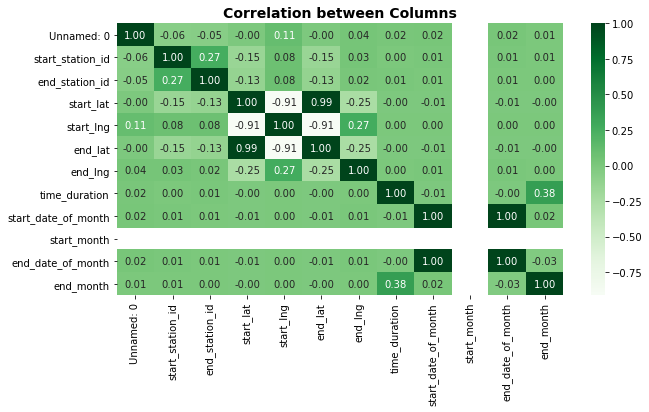

In [7]:
plt.figure(figsize=(10,5))
sb.heatmap(df.corr(), annot= True, fmt='.2f', cmap='Greens');
plt.title('Correlation between Columns', fontsize=14, weight='bold')

## (Visualization 2)
Bar chart of time duration by minutes of rides for dates of the week between the type of users, and member and non-member.

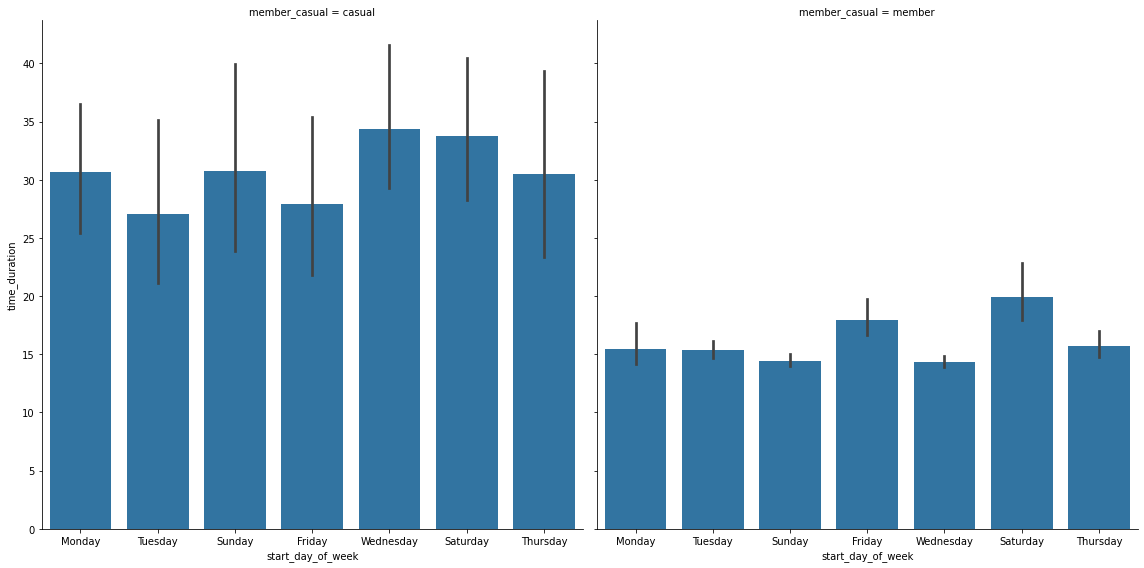

In [11]:
g = sb.FacetGrid(data=df, col='member_casual',height=8)
g.map(sb.barplot, 'start_day_of_week', 'time_duration');

## (Visualization 3)

heatmap Chart of average time duration by minutes between member and non-member user, and on dates of the week.

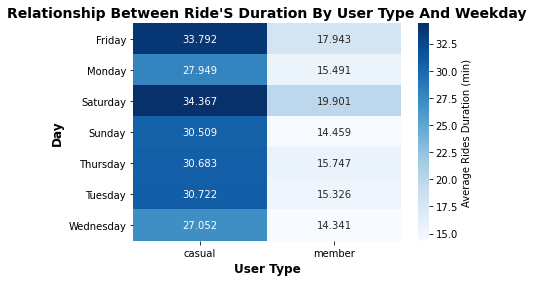

In [12]:
#--Calculating the average of ride's duration
#--Transforming the data in a pivot table to plot the heatmap
c_ = df.groupby(['member_casual','start_day_of_week']).mean()['time_duration']
c_ = c_.reset_index(name = 'average_duration')
c_ = c_.pivot(index = 'start_day_of_week', columns = 'member_casual', 
                            values = 'average_duration')
sb.heatmap(c_, annot = True, fmt = '.3f', 
           cbar_kws = {'label':'Average Rides Duration (min)'}, cmap = 'Blues')


# Add title and format it
plt.title("Relationship between ride's duration By user type and weekday".title(),
               fontsize = 14, weight = "bold")
# Add x label and format it
plt.xlabel('User Type'.title(),
               fontsize = 12, weight = "bold")
# Add y label and format it
plt.ylabel('Day'.title(),
               fontsize = 12, weight = "bold");

Graph of the given coordinates of longtitude and latitude on top of Bay Area Map

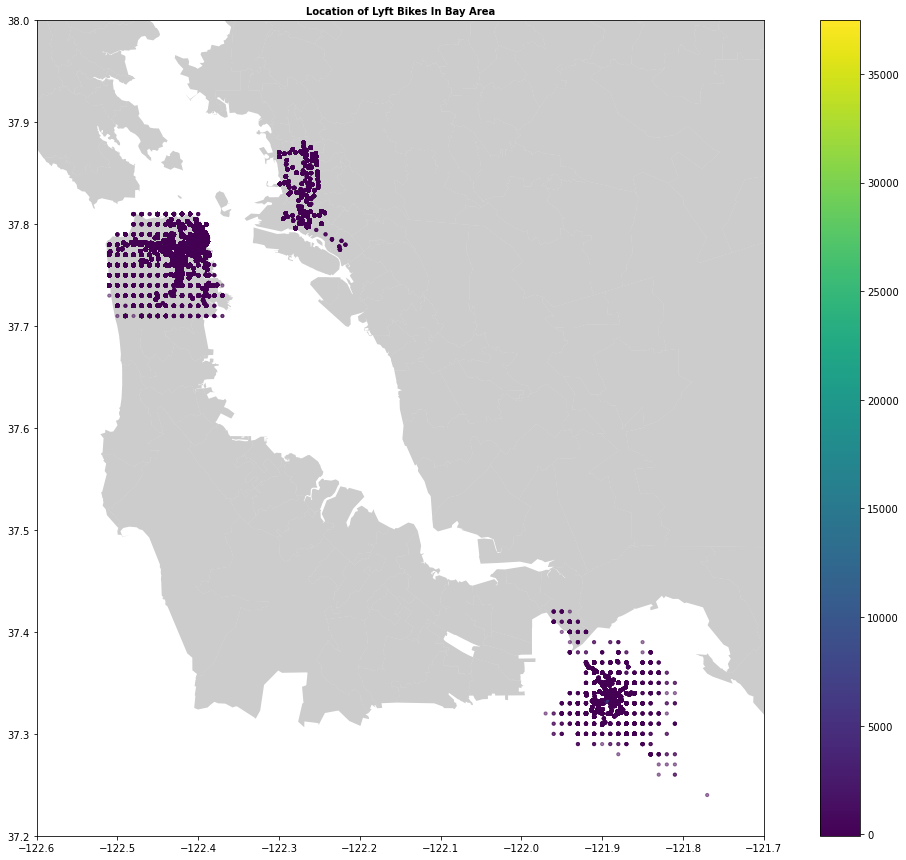

In [14]:
street_map = gpd.read_file('geo_export_ade4f47c-e11e-43b0-8565-83ef2c278f4c.shp')
# keys for assign for coorinate variable
crs = {"init":"EPSG:4326"}
# zip x and y coordinate under one feature
geometry = [Point(xy) for xy in zip(df['start_lng'],
                                    df['start_lat'])]

# Convert file in geodataframe
geo_df = gpd.GeoDataFrame(df,crs=crs, geometry=geometry)
# Extract the variable columns
geo_df = df[['geometry','time_duration']]
# Finalize and convert the extract file again to geodataframe
geo_df = gpd.GeoDataFrame(geo_df,crs=crs, geometry=geometry)

fix,ax = plt.subplots(figsize=(20,15))
# plotting the shapefile
street_map.plot(ax=ax, alpha=0.4, color='grey')
# plotting our coordinates
geo_df.plot(column='time_duration', ax=ax, alpha=0.5,
           legend=True, markersize=10);
# plot labels
plt.title('Location of Lyft Bikes In Bay Area',fontsize=10, fontweight='bold')

plt.xlim(-122.6,-121.7)
plt.ylim(37.2,38)
plt.show();